In [2]:
import random
import csv
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

In [3]:
#Create type for minimization of the function (minimum distance)
creator.create("FitnessMin",base.Fitness,weights=(-1.0,))

#Create type for store individual (in this example we use list) 
creator.create("Individual", list, fitness=creator.FitnessMin)


In [4]:
CITY_NUMBER = 20
X_DIM = 100
Y_DIM = 100

#Create the location of the cities (map) for calculation distance in the fitness function (random locations)
items = {}

for i in range(CITY_NUMBER):
        items[i] = (random.randint(0,X_DIM),random.randint(0,Y_DIM))
        
print(items)

{0: (38, 15), 1: (13, 67), 2: (16, 65), 3: (19, 76), 4: (74, 54), 5: (19, 65), 6: (66, 59), 7: (51, 88), 8: (48, 75), 9: (62, 81), 10: (80, 24), 11: (71, 35), 12: (17, 70), 13: (46, 28), 14: (29, 10), 15: (21, 62), 16: (13, 72), 17: (51, 92), 18: (79, 2), 19: (56, 54)}


In [5]:
import numpy
# Define the code for plotting the city on the map
# Later, we need the function for plotting the obtained solution on the map (for evaluation)
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Set the size of the plot
fig.set_figwidth(10)
fig.set_figheight(10)

# Get the coordinates vectors x and y from the items collection
number_of_items = len(items)
x = [items[i][0] for i in range(0,number_of_items) ]
y = [items[i][1] for i in range(0,number_of_items) ]

# Plot the points in the map (map: 100 x 100 pixels)
plt.scatter(x, y)

# Additionally, add a label for each point (further describe the order of the cities in the travel)
for i in range(0,number_of_items):
    ax1.annotate(i, (x[i]+1, y[i]+1))
    
plt.show()


<Figure size 1000x1000 with 1 Axes>

In [6]:
import csv
items = {}
i = 0 
with open(f'TSP_{CITY_NUMBER}.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        items[i] = (int(row['x']), int(row['y']))
        i=i+1 

In [7]:
#Create the class for rand cities with different order without repetition in an effective way for Deap framework
class RandCity:
    def __init__(self, city_number):
        self._city_number = city_number
        self._rand_tab = random.sample(range(self._city_number),self._city_number)
        self._i = 0
    def get_next_city_number(self):
        if self._i==self._city_number:
            self._i = 0
            self._rand_tab = random.sample(range(self._city_number),self._city_number)
        self._i += 1
        return self._rand_tab[self._i-1]

In [8]:
#Create toolbox for register needed functions
toolbox = base.Toolbox()
#Create object for get random cities without repeat
rc = RandCity(CITY_NUMBER)

#Register function used for init content of the individual (for the TSP problem are the integer values)
toolbox.register("attribute_int",rc.get_next_city_number)

#Register function used for init Population of the individuals
toolbox.register("individual", tools.initRepeat, 
creator.Individual, toolbox.attribute_int, n=CITY_NUMBER)

#Register function for create population of individuals
toolbox.register("population",tools.initRepeat, list, 
toolbox.individual)


In [9]:
#Testing the registered function (look on the content of the individual – you should check the repetition of cities)
ind1 = toolbox.individual()


In [10]:
pop = toolbox.population(n=10)
print(pop)

[[9, 4, 8, 7, 0, 14, 6, 3, 17, 2, 10, 5, 18, 19, 15, 11, 1, 13, 12, 16], [13, 1, 5, 3, 15, 14, 2, 18, 11, 8, 6, 17, 19, 12, 10, 16, 9, 7, 0, 4], [7, 1, 16, 5, 6, 8, 0, 10, 14, 17, 4, 19, 13, 2, 12, 9, 18, 15, 11, 3], [12, 10, 19, 3, 11, 4, 16, 14, 7, 0, 5, 9, 8, 1, 2, 15, 18, 6, 17, 13], [14, 16, 11, 18, 5, 10, 8, 9, 4, 0, 1, 17, 2, 15, 7, 12, 3, 13, 19, 6], [7, 6, 0, 10, 9, 13, 1, 8, 11, 14, 19, 16, 15, 18, 2, 12, 5, 4, 17, 3], [5, 17, 6, 12, 1, 7, 19, 14, 9, 15, 0, 16, 10, 11, 4, 13, 3, 18, 2, 8], [15, 16, 10, 9, 4, 0, 11, 1, 7, 3, 17, 2, 5, 13, 12, 6, 19, 8, 14, 18], [4, 10, 7, 0, 17, 2, 13, 8, 14, 9, 19, 5, 15, 18, 6, 1, 12, 3, 11, 16], [11, 10, 15, 3, 14, 5, 1, 8, 2, 17, 12, 0, 4, 9, 18, 16, 6, 7, 19, 13]]


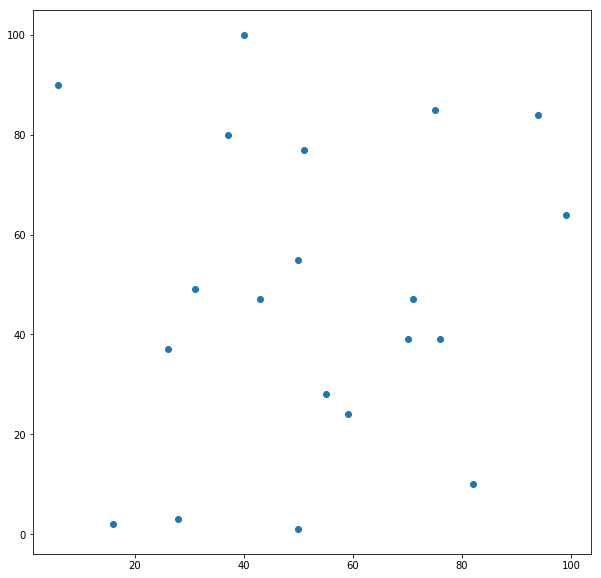

In [11]:
#Draw the exemplary path in the map
fig, ax1 = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
size = len(items)

#Get list of the x and y values for plot path on the map
x = [items[i][0] for i in range(0,size) ]
y = [items[i][1] for i in range(0,size) ]
plt.scatter(x, y)


[9, 4, 8, 7, 0, 14, 6, 3, 17, 2, 10, 5, 18, 19, 15, 11, 1, 13, 12, 16]
[70, 51, 26, 16, 75, 37, 31, 40, 50, 43, 28, 59, 76, 6, 50, 71, 99, 94, 55, 82]
[39, 77, 37, 2, 85, 80, 49, 100, 1, 47, 3, 24, 39, 90, 55, 47, 64, 84, 28, 10]


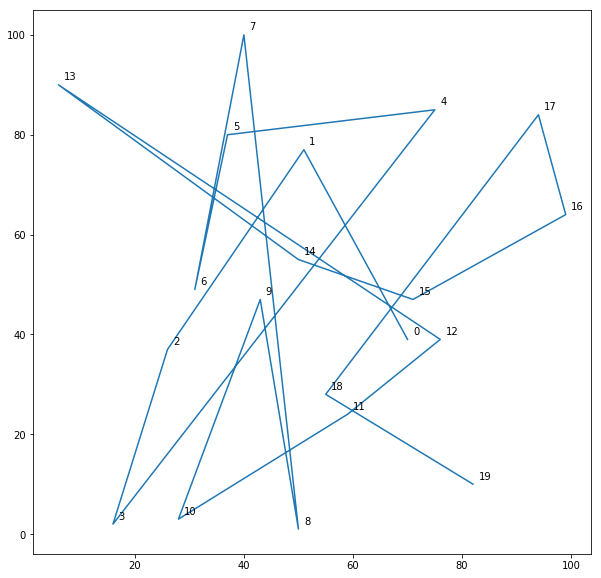

In [12]:
#Get exemplary individual
individual = pop[0]
print(individual)
#Get the list of the x and y values for plot the path on the map using path encoded in the individual[0]
xp = [items[individual[i]][0] for i in range(0,size) ]
yp = [items[individual[i]][1] for i in range(0,size) ]
print(xp)
print(yp)

fig, ax1 = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
size = len(items)

plt.plot(xp,yp)
# Add annotation (order) on the path
for i in range(0,size):
    ax1.annotate(i, (xp[i]+1, yp[i]+1))


In [13]:
#Create function for display final results (the look of the path)
def plotPath(individual, items):
    fig, ax1 = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    size = len(items)
    x = [items[i][0] for i in range(0,size) ]
    y = [items[i][1] for i in range(0,size) ]
        
    plt.scatter(x, y)
    print(individual)
    xp = [items[individual[i]][0] for i in range(0,size) ]
    yp = [items[individual[i]][1] for i in range(0,size) ]
    print(xp)
    print(yp)
    plt.plot(xp,yp)
    
    for i in range(0,size):
        ax1.annotate(f'{i}:({xp[i]},{yp[i]})', (xp[i]+1, 
yp[i]+1))
    plt.show()


[13, 1, 5, 3, 15, 14, 2, 18, 11, 8, 6, 17, 19, 12, 10, 16, 9, 7, 0, 4]
[94, 99, 59, 40, 50, 37, 43, 76, 71, 26, 31, 50, 6, 55, 28, 82, 70, 16, 75, 51]
[84, 64, 24, 100, 55, 80, 47, 39, 47, 37, 49, 1, 90, 28, 3, 10, 39, 2, 85, 77]


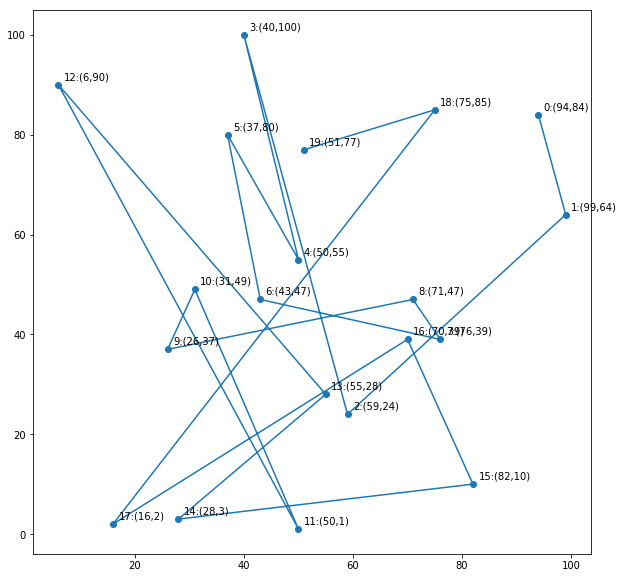

In [14]:
plotPath(pop[1], items)

In [15]:
def mutate_tsp(ind, pos_number):
    """The function for mutating the way between cities
       Perform change of the city order
       param: ind - individual for mutating
       param: pos_number - pos number for change"""
    size = len(ind)
    #Positions where we perform mutation
    points = [random.randint(0,size-1) for i in range(0,pos_number)]
    #New values in the positions
    values = [random.randint(0,size-1) for i in range(0,pos_number)]
    #change the positions
    for p, v in zip(points,values):
        replaced = ind[p] # remember what we replace
        ind[p] = v # mutate the path
        pos = ind.index(v) # find place for repair
        ind[pos] = replaced # repair (the repetition of the city)
    return ind #return the feasible solution (always)


In [16]:
#Test mutation (one point – changes 2 values)
print(pop[0])
mutate_tsp(pop[0],1)
print(pop[0])


[9, 4, 8, 7, 0, 14, 6, 3, 17, 2, 10, 5, 18, 19, 15, 11, 1, 13, 12, 16]
[9, 4, 8, 7, 0, 14, 6, 3, 17, 2, 10, 5, 18, 19, 15, 11, 1, 13, 12, 16]


In [17]:
#Test mutation (two point – changes four values)
print(pop[0])
mutate_tsp(pop[0],2)
print(pop[0])

[9, 4, 8, 7, 0, 14, 6, 3, 17, 2, 10, 5, 18, 19, 15, 11, 1, 13, 12, 16]
[9, 4, 8, 7, 1, 14, 6, 3, 17, 2, 10, 5, 18, 19, 15, 11, 0, 13, 12, 16]


In [18]:
def cx_one_point_tsp(ind1, ind2):
    #Function perform crossing of the two individuals
    #with repairment of the not correctect way between cities.
    #Function exchane only one value on the cxpoint location (is 
    #the easier version of the full crossing)
    #param ind1: The first individual for crossing
    #param ind2: The second individual for crossing
    #returns: A touple of two new individuals"""
    size = min(len(ind1),len(ind2))
    cxpoint = random.randint(0,size-1)
    # The printing function describe crossing 
    # You can evaluate the correctness of the crossing
    print(f'replace point [{cxpoint}]: {ind1[cxpoint]}<=>{ind2[cxpoint]} ')
    #Ease crossing, with repairment
    x, y = ind1[cxpoint], ind2[cxpoint] #remember values for exchange
    loc1 = ind1.index(y) #positions need repairement
    loc2 = ind2.index(x) 
    ind1[cxpoint] = y #cross
    ind1[loc1] = x #and repair 
    ind2[cxpoint] = x #cross
    ind2[loc2] = y #and repair
    return ind1, ind2 #returns correct (feasible) solutions

In [19]:
#Test the cross over operator (one point) on the first two individuals)
print(pop[0])
print(pop[1])
cx_one_point_tsp(pop[0],pop[1])
print(pop[0])
print(pop[1])

[9, 4, 8, 7, 1, 14, 6, 3, 17, 2, 10, 5, 18, 19, 15, 11, 0, 13, 12, 16]
[13, 1, 5, 3, 15, 14, 2, 18, 11, 8, 6, 17, 19, 12, 10, 16, 9, 7, 0, 4]
replace point [13]: 19<=>12 
[9, 4, 8, 7, 1, 14, 6, 3, 17, 2, 10, 5, 18, 12, 15, 11, 0, 13, 19, 16]
[13, 1, 5, 3, 15, 14, 2, 18, 11, 8, 6, 17, 12, 19, 10, 16, 9, 7, 0, 4]


In [26]:
import math
# Evaluation of the problem - calculate the sum of distance in the complete tour
def fitness_tsp(individual):
    distance = 0
    for city1, city2 in zip(individual[::1], individual[1::1]): 
        buf1 = items[city1][0] - items[city2][0]
        buf2 = items[city1][1] - items[city2][1]
        distance += math.sqrt(buf1*buf1 + buf2*buf2)
        # And, the distance between the first and the last
        # This is Euclidean distance, but in the case of real 
        # problems you can use (fuel cost, time cost, way cost)
        distance += math.sqrt( (items[individual[0]][0] -items[individual[len(individual)-1]][0])**2 +(items[individual[0]][1] -items[individual[len(individual)-1]][1])**2 )
    return distance,


In [27]:
toolbox.register("mate", cx_one_point_tsp)
toolbox.register("mutate",mutate_tsp,pos_number=1)
toolbox.register("select",tools.selTournament,tournsize=2)
toolbox.register("evaluate",fitness_tsp)

In [29]:
import numpy
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg",numpy.mean)
stats.register("std",numpy.std)
stats.register("min",numpy.min)
stats.register("max",numpy.max)

In [34]:
#Define algorithm
def GA_ALG(CXPB,MUTPB,NGEN,N,stats):
    pop = toolbox.population(n=N) #(1)
    logbook = tools.Logbook()
    # Evaluate the entire population #(2)
    fitnesses = map(toolbox.evaluate, pop)
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    #Loop over generations
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop)) #(3)
        # Clone the selected individuals
        offspring_map = map(toolbox.clone, offspring)
        offspring = ([x for x in offspring_map])
        
 # Apply crossover and mutation on the offspring #(4)
        for child1, child2 in zip(offspring[::2], offspring[1::2]): 
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
            
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
                
        # Evaluate the individuals with an invalid fitness #(2)
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
            
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        record = stats.compile(pop)
        #print(record)
        logbook.record(gen=g, evals=len(invalid_ind), **record)
    return pop, logbook


In [47]:
pop, logbook = GA_ALG(0.5,0.1,500,100,stats)
gen, avg, std, Min, Max = logbook.select('gen','avg','std','min','max')


replace point [4]: 7<=>6 
replace point [2]: 2<=>1 
replace point [4]: 5<=>8 
replace point [0]: 15<=>19 
replace point [3]: 7<=>4 
replace point [6]: 7<=>12 
replace point [19]: 14<=>9 
replace point [7]: 17<=>12 
replace point [11]: 17<=>18 
replace point [10]: 13<=>0 
replace point [10]: 13<=>12 
replace point [16]: 16<=>15 
replace point [5]: 5<=>18 
replace point [17]: 14<=>19 
replace point [17]: 13<=>13 
replace point [13]: 4<=>15 
replace point [17]: 3<=>9 
replace point [0]: 18<=>18 
replace point [15]: 1<=>8 
replace point [4]: 8<=>12 
replace point [3]: 19<=>16 
replace point [4]: 7<=>7 
replace point [14]: 2<=>14 
replace point [5]: 13<=>19 
replace point [17]: 13<=>11 
replace point [4]: 3<=>3 
replace point [11]: 8<=>4 
replace point [15]: 15<=>17 
replace point [17]: 7<=>19 
replace point [10]: 18<=>12 
replace point [3]: 10<=>7 
replace point [10]: 15<=>0 
replace point [14]: 11<=>9 
replace point [10]: 9<=>2 
replace point [11]: 3<=>3 
replace point [15]: 1<=>18 
repla

No handles with labels found to put in legend.


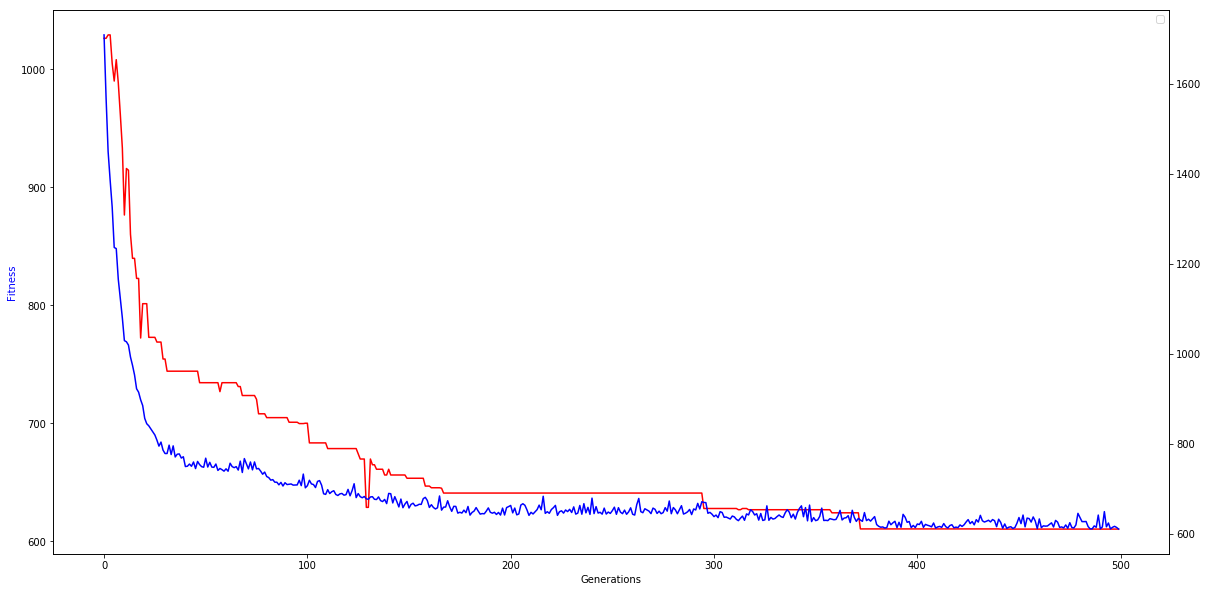

In [48]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
line1 = ax1.plot(gen, Min, "r-") #For the TSP min is the best
ax1.legend()
ax2 = ax1.twinx()
line2 = ax2.plot(gen, avg, "b-")

ax1.set_xlabel("Generations")
ax1.set_ylabel("Fitness", color="b")

plt.show()

In [49]:
evals = [ fitness_tsp(p)[0] for p in pop]
print(evals)


[610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284329742, 610.4336284

610.4336284329742
0
[12, 15, 2, 6, 19, 8, 7, 10, 17, 16, 18, 11, 4, 14, 3, 0, 13, 1, 9, 5]
[55, 50, 43, 31, 6, 26, 16, 28, 50, 82, 76, 71, 51, 37, 40, 75, 94, 99, 70, 59]
[28, 55, 47, 49, 90, 37, 2, 3, 1, 10, 39, 47, 77, 80, 100, 85, 84, 64, 39, 24]


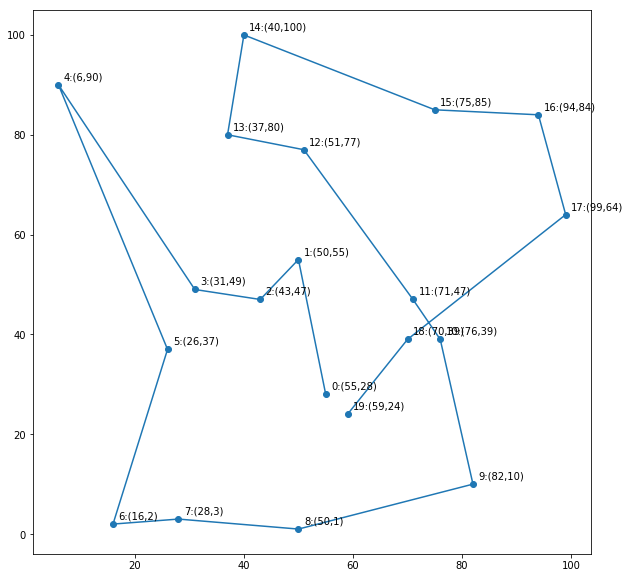

In [50]:
best = min(evals)
print(best)
pos = evals.index(best)
print(pos)
plotPath(pop[pos],items)


In [43]:
# The dictionaries for storing the average results for each parameter settings
average_all = {}
best_all = {}
worst_all = {}
CXPBs = {0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9}
for CXPB in CXPBs:
    #For get the best from all repetitions
    solution_list = [] 
    #Number of repetitions
    for i in range(0,2):
        pop, logbook = GA_ALG(CXPB,0.05,200,100,stats)
        evaluates = [fitness_tsp(p) for p in pop]
        buf = min(evaluates, key = lambda x: x[0])
        print(f'repeat: {i}, value: {buf}')
        solution_list.append(buf[0])
    #Param value (for example: the cross over probability)
    print(f'CXPB: {CXPB}')
    #Print the worst solution (fitness function)
    print(f'worst: {max(solution_list)}')
    #Print the average results
    average = sum(solution_list)/len(solution_list)
    print(f'average: {average}')
    #Print the best solution
    print(f'best: {min(solution_list)}')
    #store the solutions in the list for create a plot
    average_all[CXPB] = average
    best_all[CXPB] = min(solution_list)
    worst_all[CXPB] = max(solution_list)

replace point [17]: 10<=>14 
replace point [11]: 14<=>10 
replace point [9]: 5<=>13 
replace point [3]: 9<=>19 
replace point [11]: 12<=>10 
replace point [4]: 18<=>14 
replace point [17]: 17<=>7 
replace point [0]: 14<=>2 
replace point [5]: 12<=>0 
replace point [15]: 10<=>3 
replace point [10]: 3<=>9 
replace point [0]: 13<=>9 
replace point [18]: 6<=>19 
replace point [14]: 11<=>1 
replace point [10]: 9<=>6 
replace point [4]: 17<=>9 
replace point [9]: 15<=>2 
replace point [11]: 12<=>14 
replace point [11]: 0<=>3 
replace point [5]: 19<=>0 
replace point [12]: 10<=>17 
replace point [4]: 9<=>10 
replace point [13]: 18<=>14 
replace point [5]: 16<=>19 
replace point [10]: 9<=>18 
replace point [18]: 14<=>3 
replace point [11]: 10<=>17 
replace point [8]: 16<=>2 
replace point [10]: 17<=>17 
replace point [15]: 17<=>5 
replace point [9]: 8<=>6 
replace point [3]: 10<=>10 
replace point [17]: 11<=>0 
replace point [14]: 3<=>19 
replace point [1]: 19<=>1 
replace point [2]: 1<=>15 
r

In [ ]:
'''
CONCLISION in each used value we obtain the best solution as a minimum value and that influence the results , 
in every change  in parameters(for exemple in logbook min  we change parameters 100 to 500 ) 
we find the best solution(610) can be lower than we obtained in the first case(763.) and in every changes the best solution would be the minimum as well 
'''